# Convolutional Neural Networks

First, we're going to add multiple layers of convolution. The idea is that as we progress through more Conv2D layers, they will learn higher-level features.

In between each layer, we're going to introduce Max Pooling as we discussed. So after our first pass at convolving, we'll do a 2x2 MaxPooling2D layer to reduce our 32x32 images to 16x16. Then, we'll do it again to get us to 8x8, and by the end, we're down to just 4x4 images. This has a good positive impact on performance, since we end up with much less data to process. And, since we're trying to identify higher-level features as we go up the topology, it makes sense to use lower-resolution, less detailed images as we progress up. To prevent overfitting, we also do a Dropout on each layer.

Finally, we stack two Conv2D layers on top of each other within each layer of our topology. This is a trick that allows us to better pick up on non-linear patterns that may exist.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
    
def createModel(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
     
    return model

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_train.shape[0])
print(x_test.shape[0])

print (y_test[0])
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print (y_test[0])

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
50000
10000
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


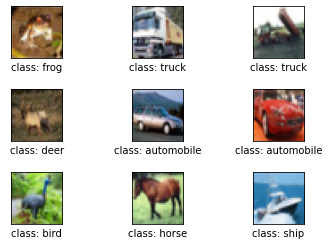

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])

    xlabel = "class: {0}".format(class_names[y_train[i].argmax()])

    # Show the classes as the label on the x-axis.
    ax.set_xlabel(xlabel)

    # Remove ticks from the plot.
    ax.set_xticks([])
    ax.set_yticks([])

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model = createModel(x_train.shape[1:])

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [7]:
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test),
          shuffle=True)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/10
1563/1563 [==============================] - 262s 167ms/step - loss: 1.9872 - accuracy: 0.2466 - val_loss: 1.7468 - val_accuracy: 0.3502
Epoch 2/10
1563/1563 [==============================] - 259s 166ms/step - loss: 1.6835 - accuracy: 0.3718 - val_loss: 1.5150 - val_accuracy: 0.4391
Epoch 3/10
1563/1563 [==============================] - 264s 169ms/step - loss: 1.5445 - accuracy: 0.4262 - val_loss: 1.4724 - val_accuracy: 0.4526
Epoch 4/10
1563/1563 [==============================] - 258s 165ms/step - loss: 1.4332 - accuracy: 0.4734 - val_loss: 1.3177 - val_accuracy: 0.5197
Epoch 5/10
1563/1563 [==============================] - 261s 167ms/step - loss: 1.3509 - accuracy: 0.5077 - val_loss: 1.2940 - val_accuracy: 0.5365
Epoch 6/10
1563/1563 [==============================] - 258s 165ms/step - loss: 1.2797 - accuracy: 0.5364 - val_loss: 1.1802 - val_accuracy: 0.5710
Epoch 7/10
1563/1563 [==============================] - 259s 165ms/step - loss: 1.2126 - accuracy: 0.5632 - val_

It is! Our original CNN achieved 60% accuracy, and we're up to 63% now - even with all those MaxPooling layers that *removed* quite a bit of information along the way. So, with MaxPooling2D we sped up our processing considerably - and by improving our topology, we didn't have to pay a price in accuracy or speed of convergence.

What's really nice is that our faster model means we can run more epochs, and get better accuracy, in a reasonable amount of time. Let's let it go for 50 epochs and see how good accuracy gets.

In [8]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 12s 37ms/step - loss: 0.9718 - accuracy: 0.6531
Test loss: 0.9718106389045715
Test accuracy: 0.6531000137329102


In [9]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 12s 37ms/step - loss: 0.9718 - accuracy: 0.6531
Test loss: 0.9718106389045715
Test accuracy: 0.6531000137329102


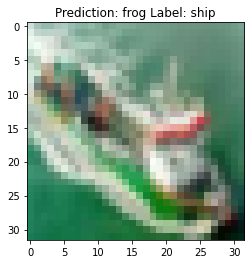

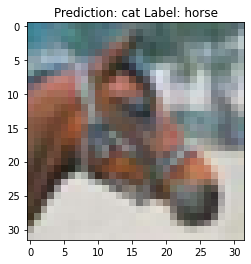

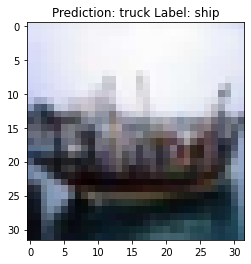

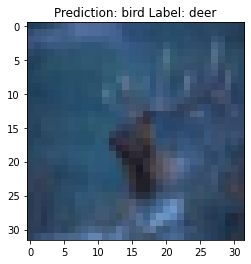

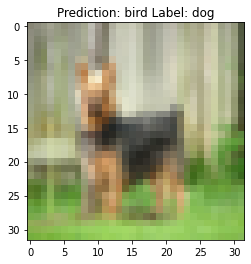

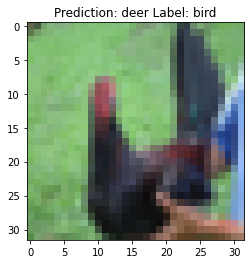

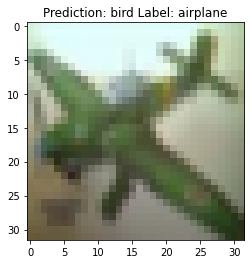

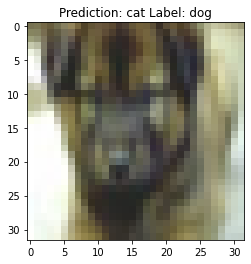

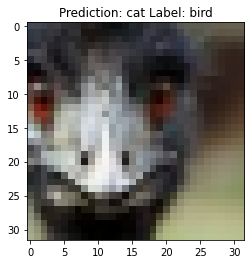

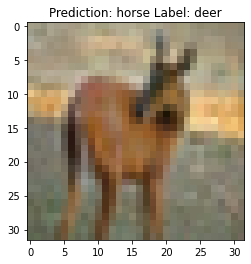

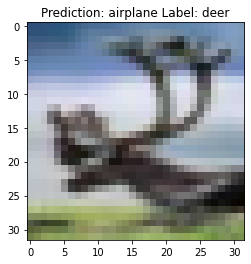

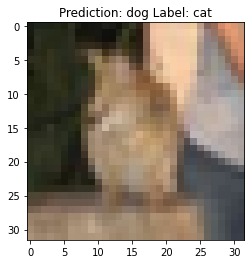

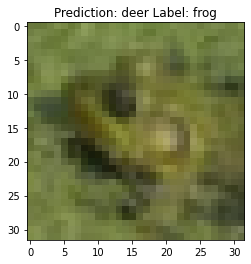

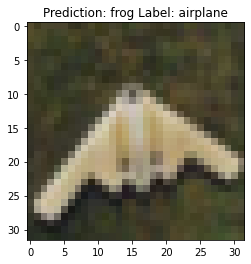

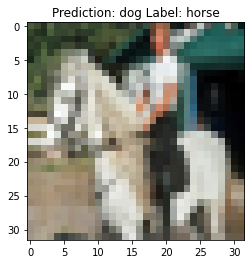

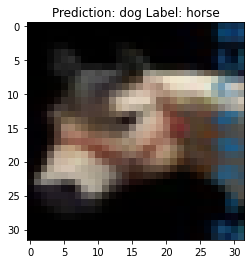

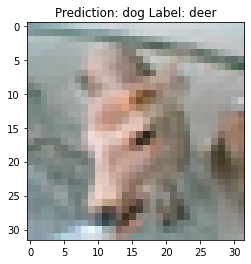

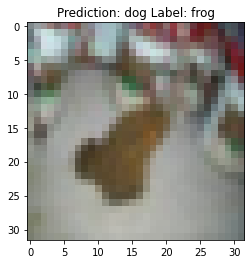

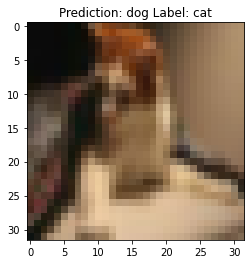

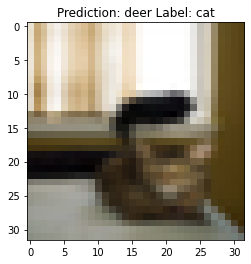

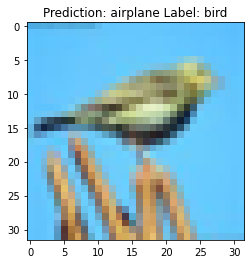

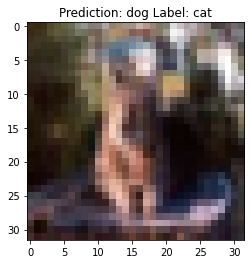

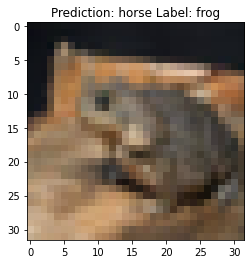

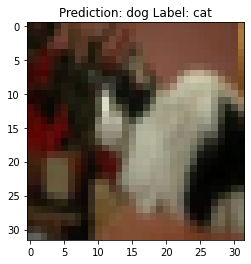

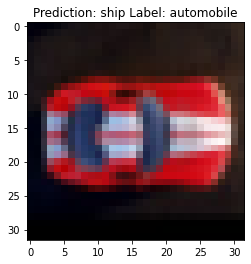

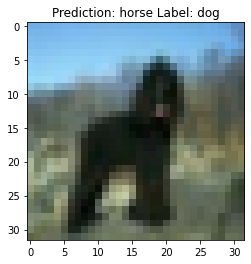

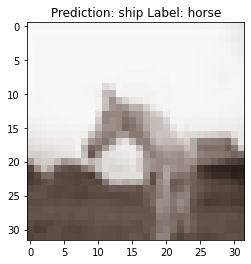

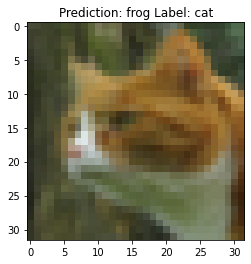

In [10]:
for x in range(100):
    test_image = x_test[x,:]
    predicted_cat = model.predict(np.array([test_image])).argmax()
    label = y_test[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %s Label: %s' % (class_names[predicted_cat], class_names[label]))
        plt.imshow(test_image)
        plt.show()